In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook

In [ ]:
date_of_samples = "2021-06-16_11-16"

df_real_results = pd.read_csv(f"data/{date_of_samples}_realResults.csv").drop("id", axis=1)
df_real_swipes = pd.read_csv(f"data/{date_of_samples}_realSwipes.csv").drop("id", axis=1)
df_real_swipes.columns = [f'{i:02d}__{x}' for i, x in enumerate(df_real_swipes.columns, 1)]
df_real_swipes_normalized = pd.read_csv(f"data/{date_of_samples}_realSwipesNormalized.csv").drop("id", axis=1)
df_real_swipes_normalized.columns = [f'{i:02d}__{x}' for i, x in enumerate(df_real_swipes_normalized.columns, 1)]
df_gan_results = pd.read_csv(f"data/{date_of_samples}_ganResults.csv").drop("id", axis=1)
df_gan_swipes = pd.read_csv(f"data/{date_of_samples}_ganSwipes.csv").drop("id", axis=1)
df_gan_swipes.columns = [f'{i:02d}_{x}' for i, x in enumerate(df_gan_swipes.columns, 1)]
df_gan_swipes_normalized = pd.read_csv(f"data/{date_of_samples}_ganSwipesNormalized.csv").drop("id", axis=1)
df_gan_swipes_normalized.columns = [f'{i:02d}_{x}' for i, x in enumerate(df_gan_swipes_normalized.columns, 1)]
df_test_results = pd.read_csv(f"data/{date_of_samples}_testResults.csv").drop("id", axis=1)
df_test_swipes = pd.read_csv(f"data/{date_of_samples}_testSwipes.csv").drop("id", axis=1)
df_test_swipes.columns = [f'{i:02d}_{x}' for i, x in enumerate(df_test_swipes.columns, 1)]

In [30]:
df_real_long = df_real_swipes.melt()
#df_real_long = df_real_swipes_normalized.melt()
df_real_long["variable"] = df_real_long["variable"] + "_real"
df_real_long

,variable,value
0,01__duration_real,0.183667
1,01__duration_real,0.176333
2,01__duration_real,0.176000
3,01__duration_real,0.164000
4,01__duration_real,0.127167
...,...,...
160,33__var_pressure_real,0.000000
161,33__var_pressure_real,0.000000
162,33__var_pressure_real,0.000000
163,33__var_pressure_real,0.000000


In [36]:
df_gan_long = df_gan_swipes.melt()
#df_gan_long = df_gan_swipes_normalized.melt()
df_gan_long["variable"] = df_gan_long["variable"] + "_gan"
df_gan_long

,variable,value
0,01_duration_gan,8.837176e+02
1,01_duration_gan,8.776454e+02
2,01_duration_gan,8.829529e+02
3,01_duration_gan,8.778443e+02
4,01_duration_gan,8.936653e+02
...,...,...
1645,33_var_pressure_gan,5.948079e-07
1646,33_var_pressure_gan,5.869493e-07
1647,33_var_pressure_gan,5.988913e-07
1648,33_var_pressure_gan,5.946429e-07


In [37]:
df_long = pd.concat([df_real_long, df_gan_long], ignore_index=True)
df_long_first_16_features = df_long[df_long["variable"].apply(lambda x: float(x.split('_')[0])) < 17]
df_long_first_16_features = df_long_first_16_features.sort_values(by="variable")
df_long_last_16_features = df_long[df_long["variable"].apply(lambda x: float(x.split('_')[0])) >= 17]
df_long_last_16_features = df_long_last_16_features.sort_values(by="variable")

<IPython.core.display.Javascript object>


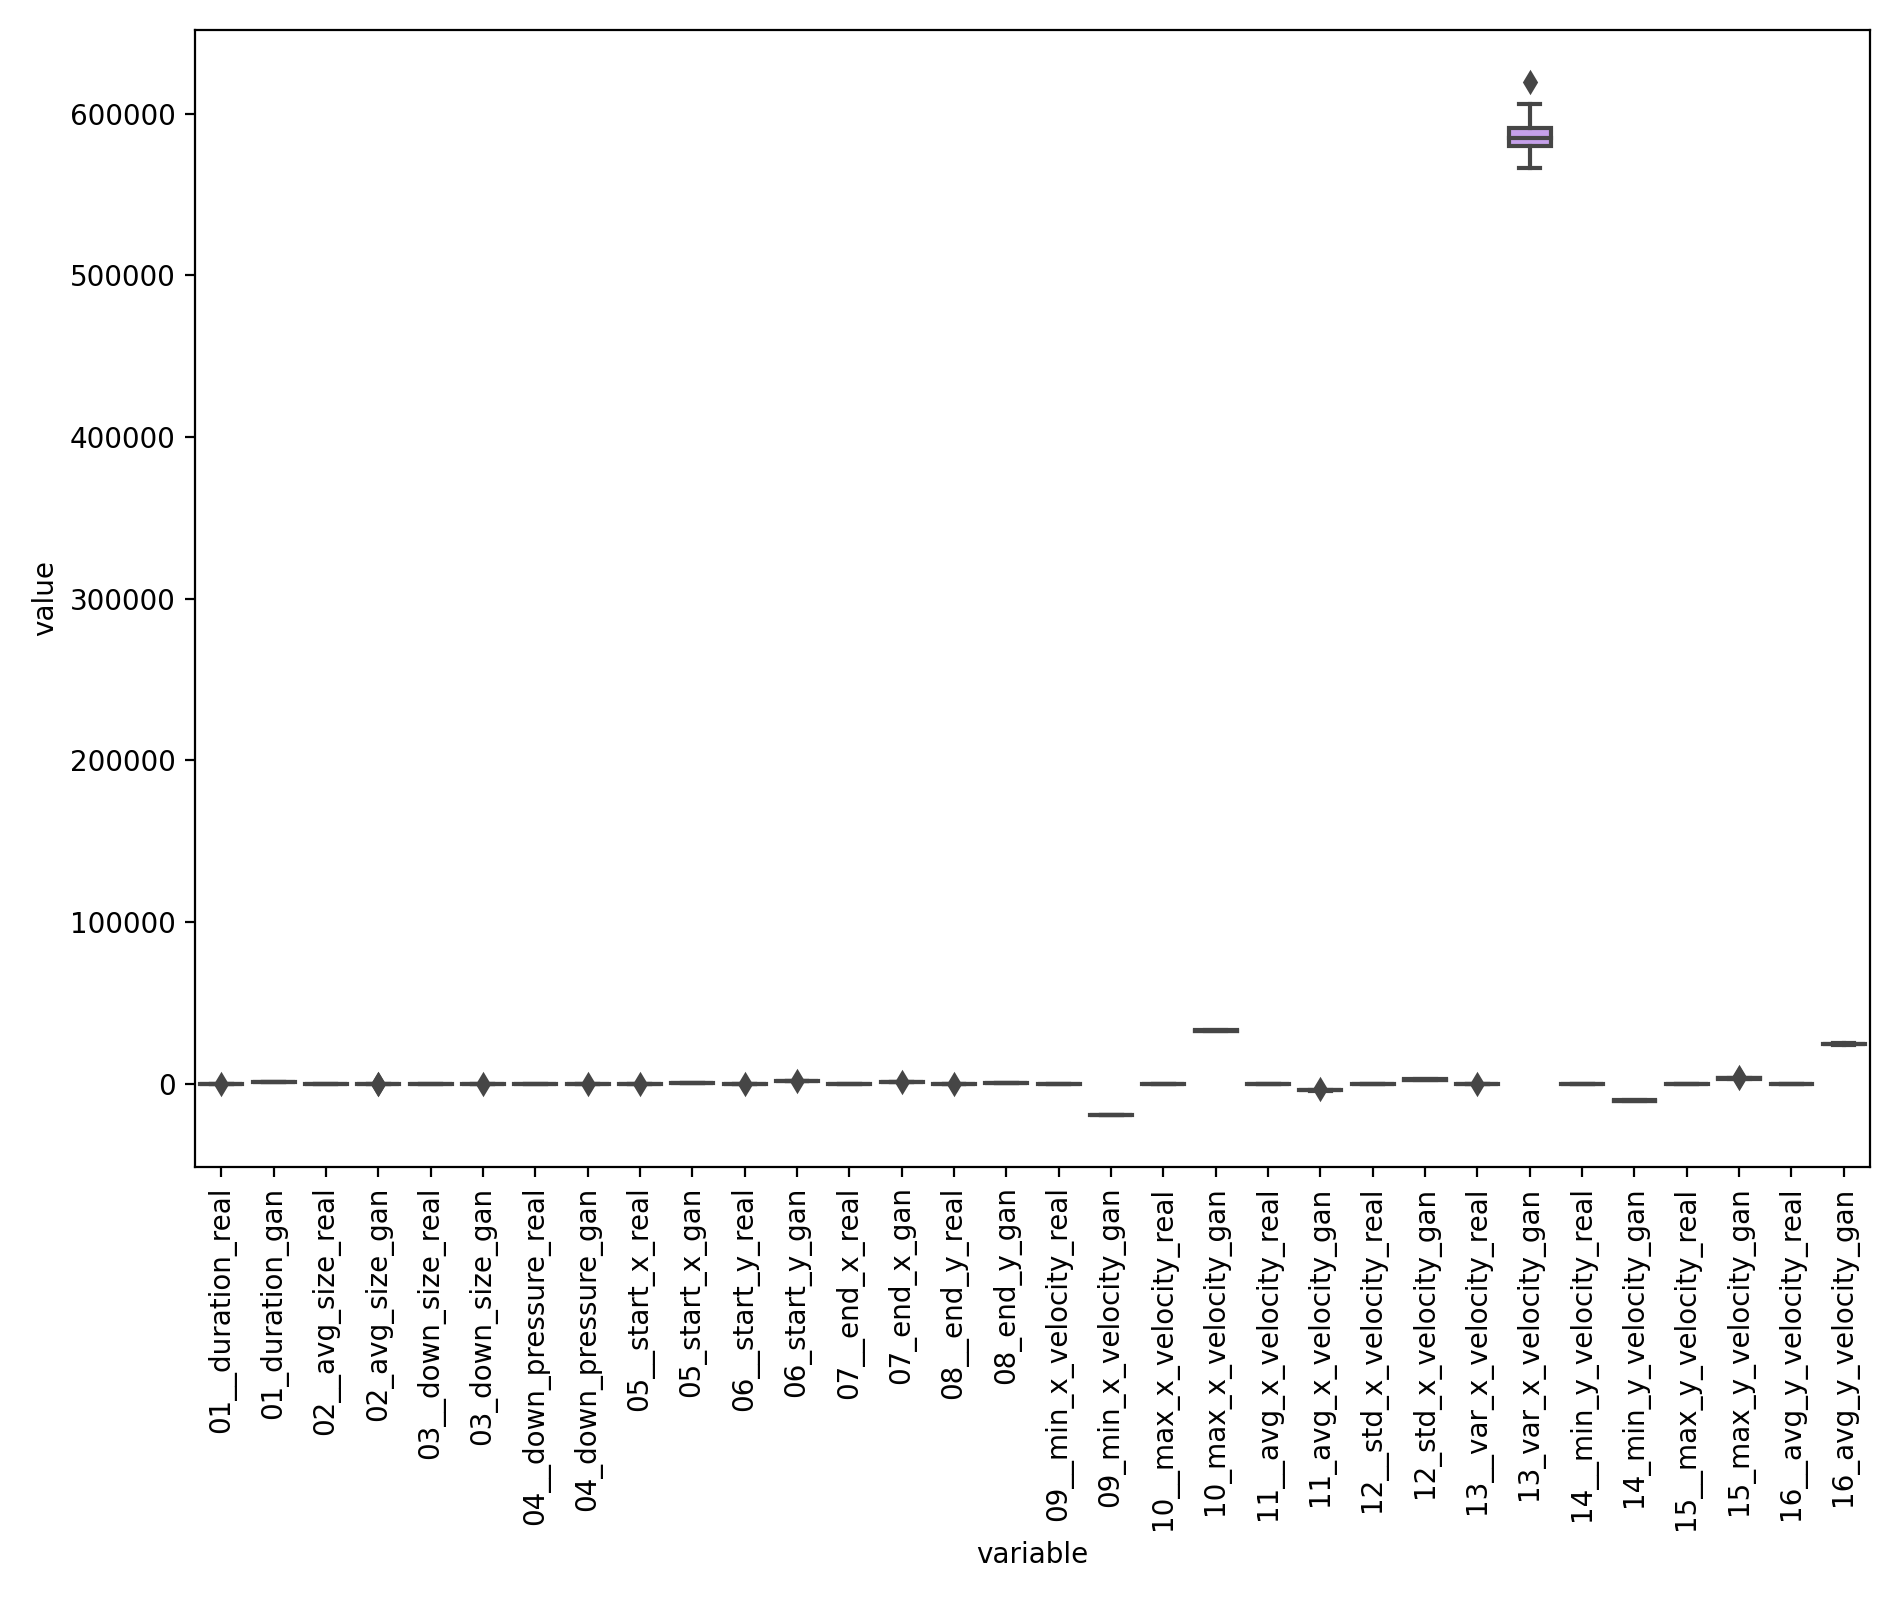

In [38]:
f, ax = plt.subplots(1,1,figsize=(9.5,8))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df_long_first_16_features, x="variable", y="value")
plt.tight_layout()

<IPython.core.display.Javascript object>


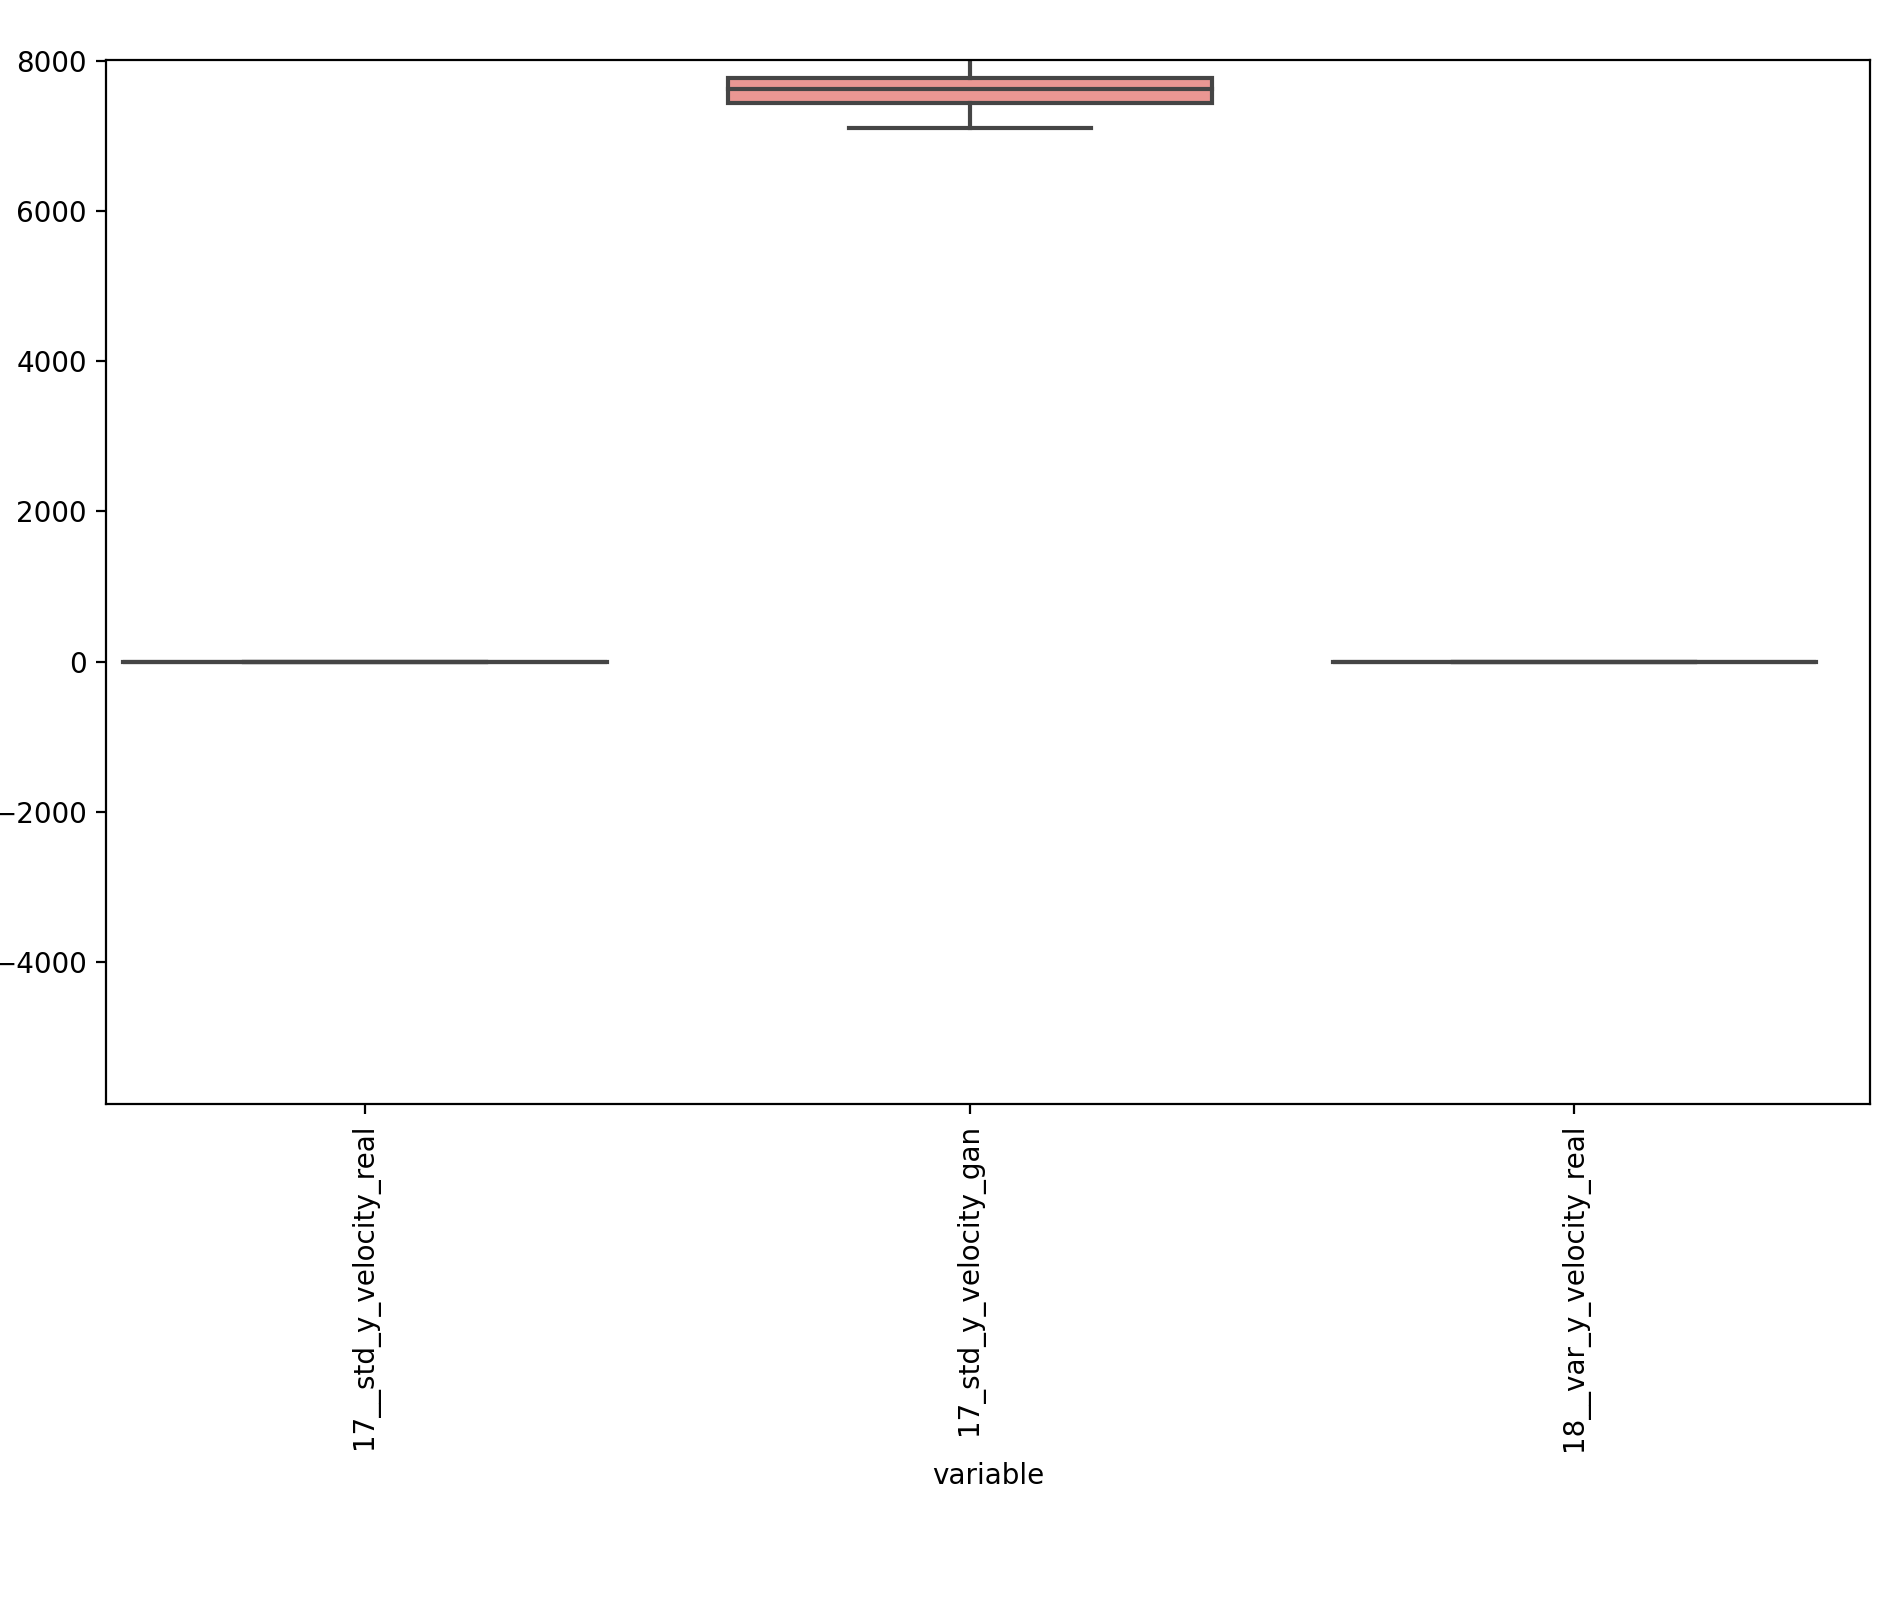

In [39]:
f, ax = plt.subplots(1,1,figsize=(9.5,8))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df_long_last_16_features, x="variable", y="value")
plt.tight_layout()